In [ ]:
#importing necessary libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import TargetEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

In [2]:
#reading and saving the data as DataFrame
df= pd.read_csv('used_car_price_dataset_extended.csv')

### **Data Overview**

In [3]:
#viewing first few rows of the dataset
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [4]:
#viewing number of rows and columns in the dataset (rows, columns)
df.shape

(10000, 12)

In [5]:
#viewing data types of columns and number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [6]:
#number of missing values in the dataset
df.isna().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [7]:
#percentage of missing values in the dataset
df.isna().sum() / len(df) * 100

make_year              0.00
mileage_kmpl           0.00
engine_cc              0.00
fuel_type              0.00
owner_count            0.00
price_usd              0.00
brand                  0.00
transmission           0.00
color                  0.00
service_history       20.38
accidents_reported     0.00
insurance_valid        0.00
dtype: float64

In [8]:
#number of duplicate values in the dataset
df.duplicated().sum()

np.int64(0)

In [9]:
#number of unique values in each column of the dataset
df.nunique()

make_year               29
mileage_kmpl          2213
engine_cc               10
fuel_type                3
owner_count              5
price_usd             9906
brand                   10
transmission             2
color                    6
service_history          2
accidents_reported       6
insurance_valid          2
dtype: int64

In [10]:
#statistical summary of numerical columns
df.describe()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2009.206900,17.960753,2287.130000,3.003500,7179.754532,0.492200
std,8.373858,5.025486,1291.276927,1.418904,2795.270940,0.694109
min,1995.000000,5.000000,800.000000,1.000000,1000.000000,0.000000
25%,2002.000000,14.540000,1200.000000,2.000000,5176.547500,0.000000
50%,2009.000000,17.970000,1800.000000,3.000000,6961.260000,0.000000
75%,2016.000000,21.352500,3000.000000,4.000000,8993.732500,1.000000
max,2023.000000,35.000000,5000.000000,5.000000,17647.630000,5.000000


In [11]:
#statistical summary of categorical columns
df.describe(include= "object")

,fuel_type,brand,transmission,color,service_history,insurance_valid
count,10000,10000,10000,10000,7962,10000
unique,3,10,2,6,2,2
top,Petrol,Nissan,Manual,Gray,Full,Yes
freq,4968,1089,5985,1705,4987,7934


In [12]:
#column names
df.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count',
       'price_usd', 'brand', 'transmission', 'color', 'service_history',
       'accidents_reported', 'insurance_valid'],
      dtype='object')

### **Exploratory Data Analysis**

In [13]:
cat_cols= df.select_dtypes(['object','category']).columns.tolist()
for col in cat_cols:
    print(df[col].value_counts())
    print("-" * 50)

fuel_type
Petrol      4968
Diesel      4058
Electric     974
Name: count, dtype: int64
--------------------------------------------------
brand
Nissan        1089
Volkswagen    1033
BMW           1021
Tesla         1006
Honda         1003
Chevrolet      999
Hyundai        989
Toyota         956
Kia            955
Ford           949
Name: count, dtype: int64
--------------------------------------------------
transmission
Manual       5985
Automatic    4015
Name: count, dtype: int64
--------------------------------------------------
color
Gray      1705
Black     1702
Red       1678
White     1651
Blue      1634
Silver    1630
Name: count, dtype: int64
--------------------------------------------------
service_history
Full       4987
Partial    2975
Name: count, dtype: int64
--------------------------------------------------
insurance_valid
Yes    7934
No     2066
Name: count, dtype: int64
--------------------------------------------------


#### **Univariate Analysis**

In [14]:
def hist_box_plot(data, column):
    if column in data.columns:
        #setting axis for subplots
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        #plotting histogram
        sns.histplot(data[column], ax= axes[0], kde= True)
        #setting title for the plots
        axes[0].set_title(f"Distribution of {column} column")
        #plotting box-plot
        sns.boxplot(data[column], ax= axes[1])
        #setting title for the plots
        axes[1].set_title(f"Box-plot of {column} column")
        plt.show() 

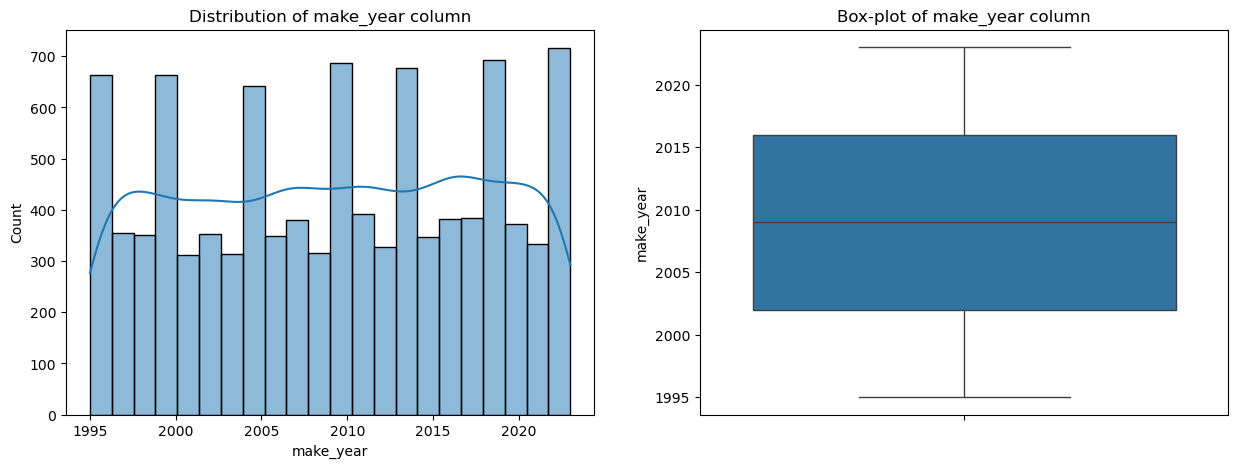

In [15]:
hist_box_plot(df, 'make_year')

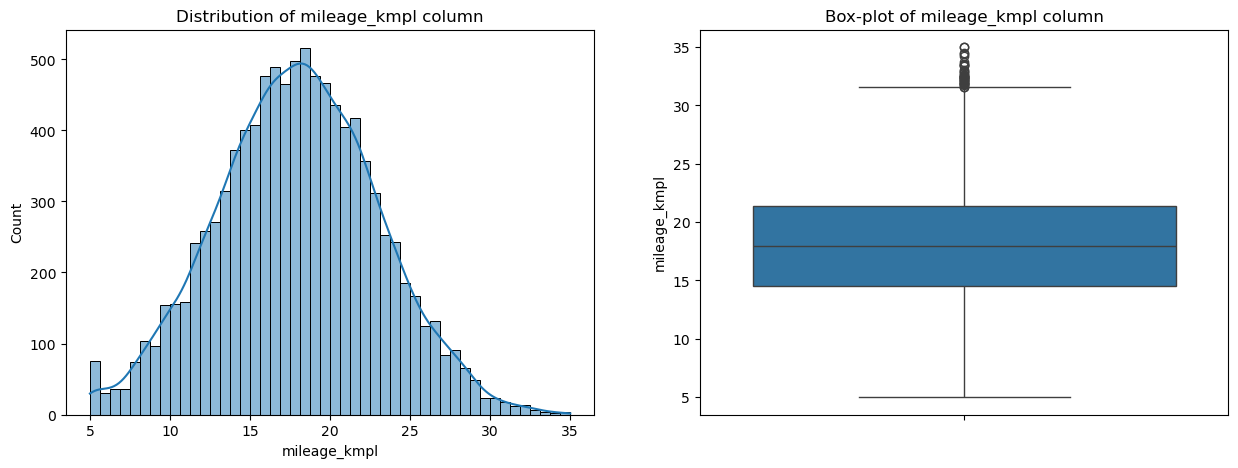

In [16]:
hist_box_plot(df, 'mileage_kmpl')

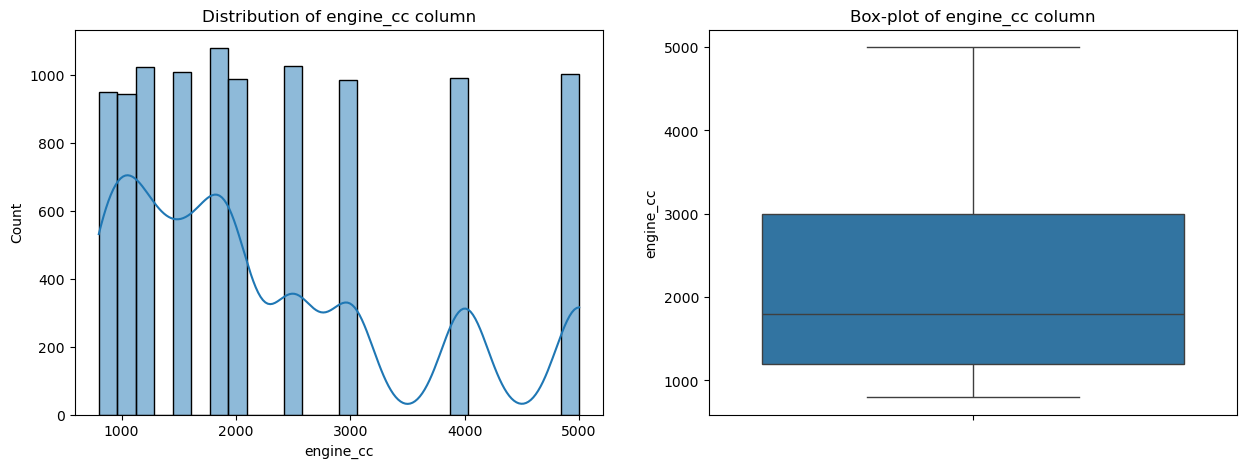

In [17]:
hist_box_plot(df, 'engine_cc')

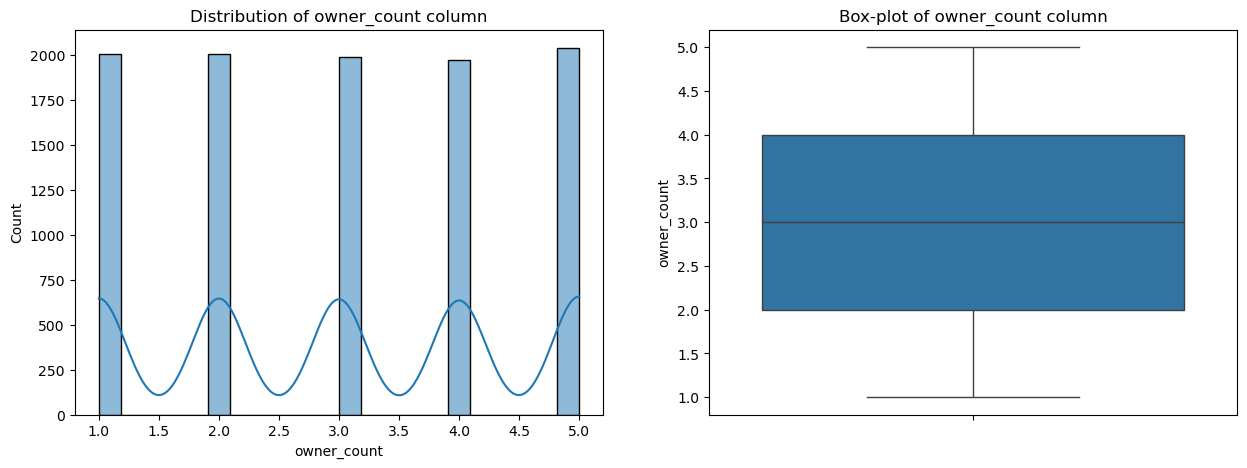

In [18]:
hist_box_plot(df, 'owner_count')

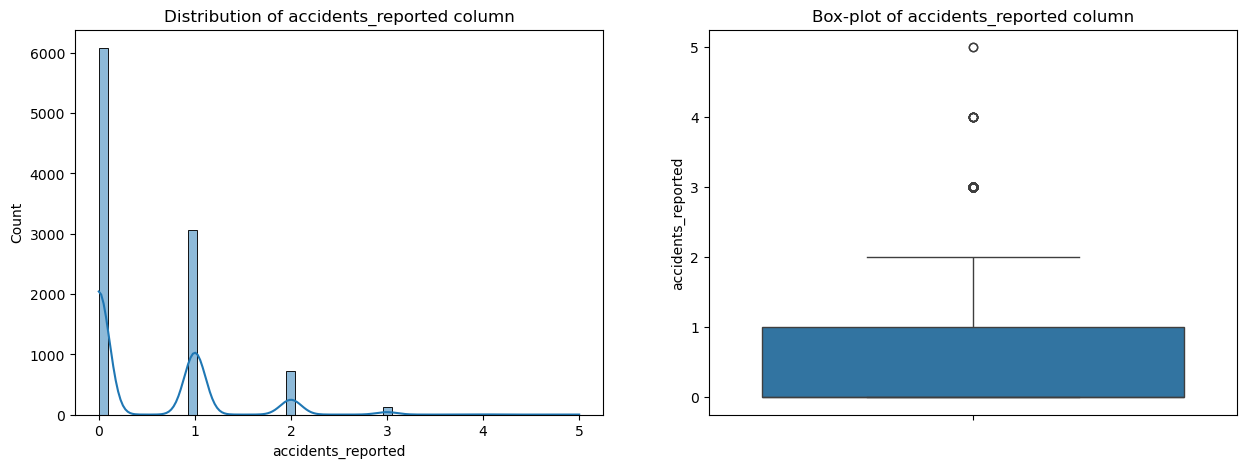

In [19]:
hist_box_plot(df, 'accidents_reported')

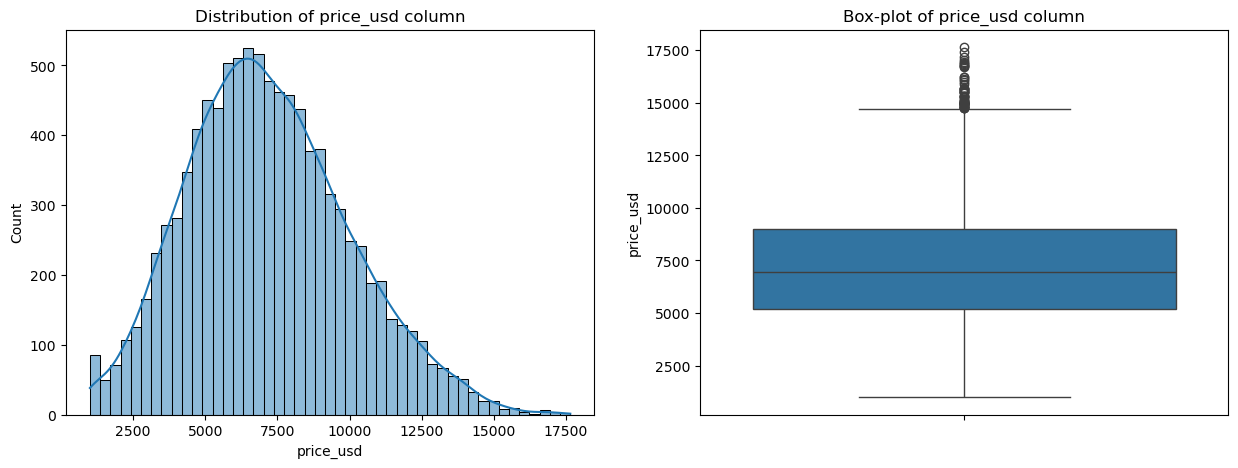

In [20]:
hist_box_plot(df, 'price_usd')

In [21]:
def count_plot(data):
    #selecting categorical columns
    cat_cols= data.select_dtypes(['object','category']).columns.tolist() 
    #setting axis for subplots
    fig, axes= plt.subplots(3,2,figsize=(16,12))
    axes= axes.flatten()
    for i, col in enumerate(cat_cols):
        #plotting count-plot for categorical columns
        sns.countplot(data= data, x=col, ax= axes[i], palette= 'hls',hue= col, orient= 'v')
        plt.tight_layout()
        #setting title for plots
        axes[i].set_title(f"Number of properties for {col}")
        #setting x-label for plots
        axes[i].set_xlabel(col)
    plt.show() 

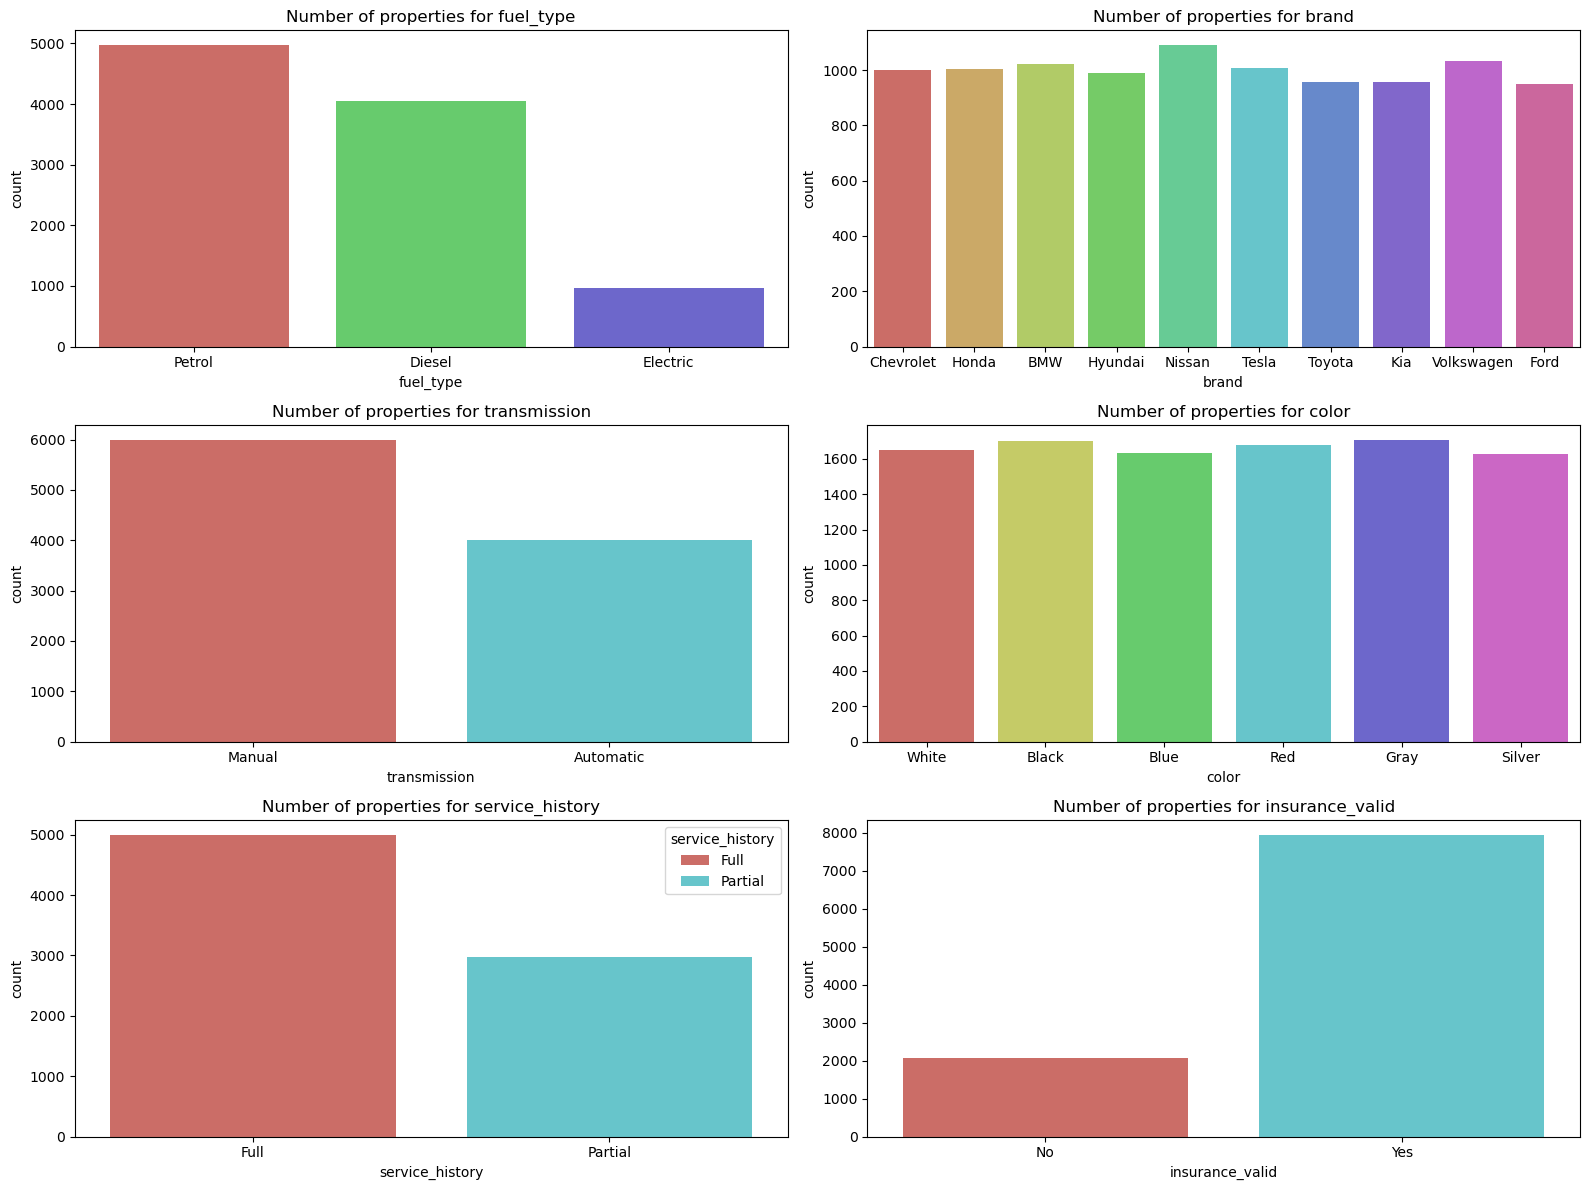

In [22]:
count_plot(df)

### **Bivariate Analysis**

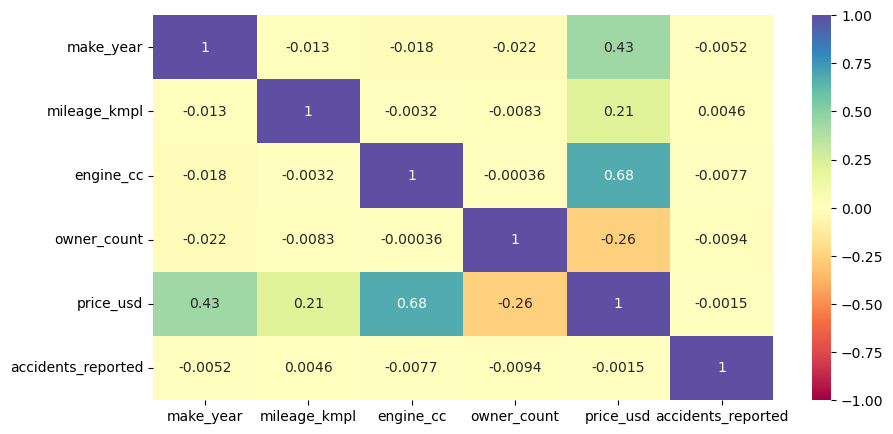

In [23]:
#displaying correlation matrix
plt.figure(figsize=(10,5))
corr_matrix= df.corr(numeric_only= True)
#displaying heatmap for the correlation-matrix
sns.heatmap(corr_matrix,annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

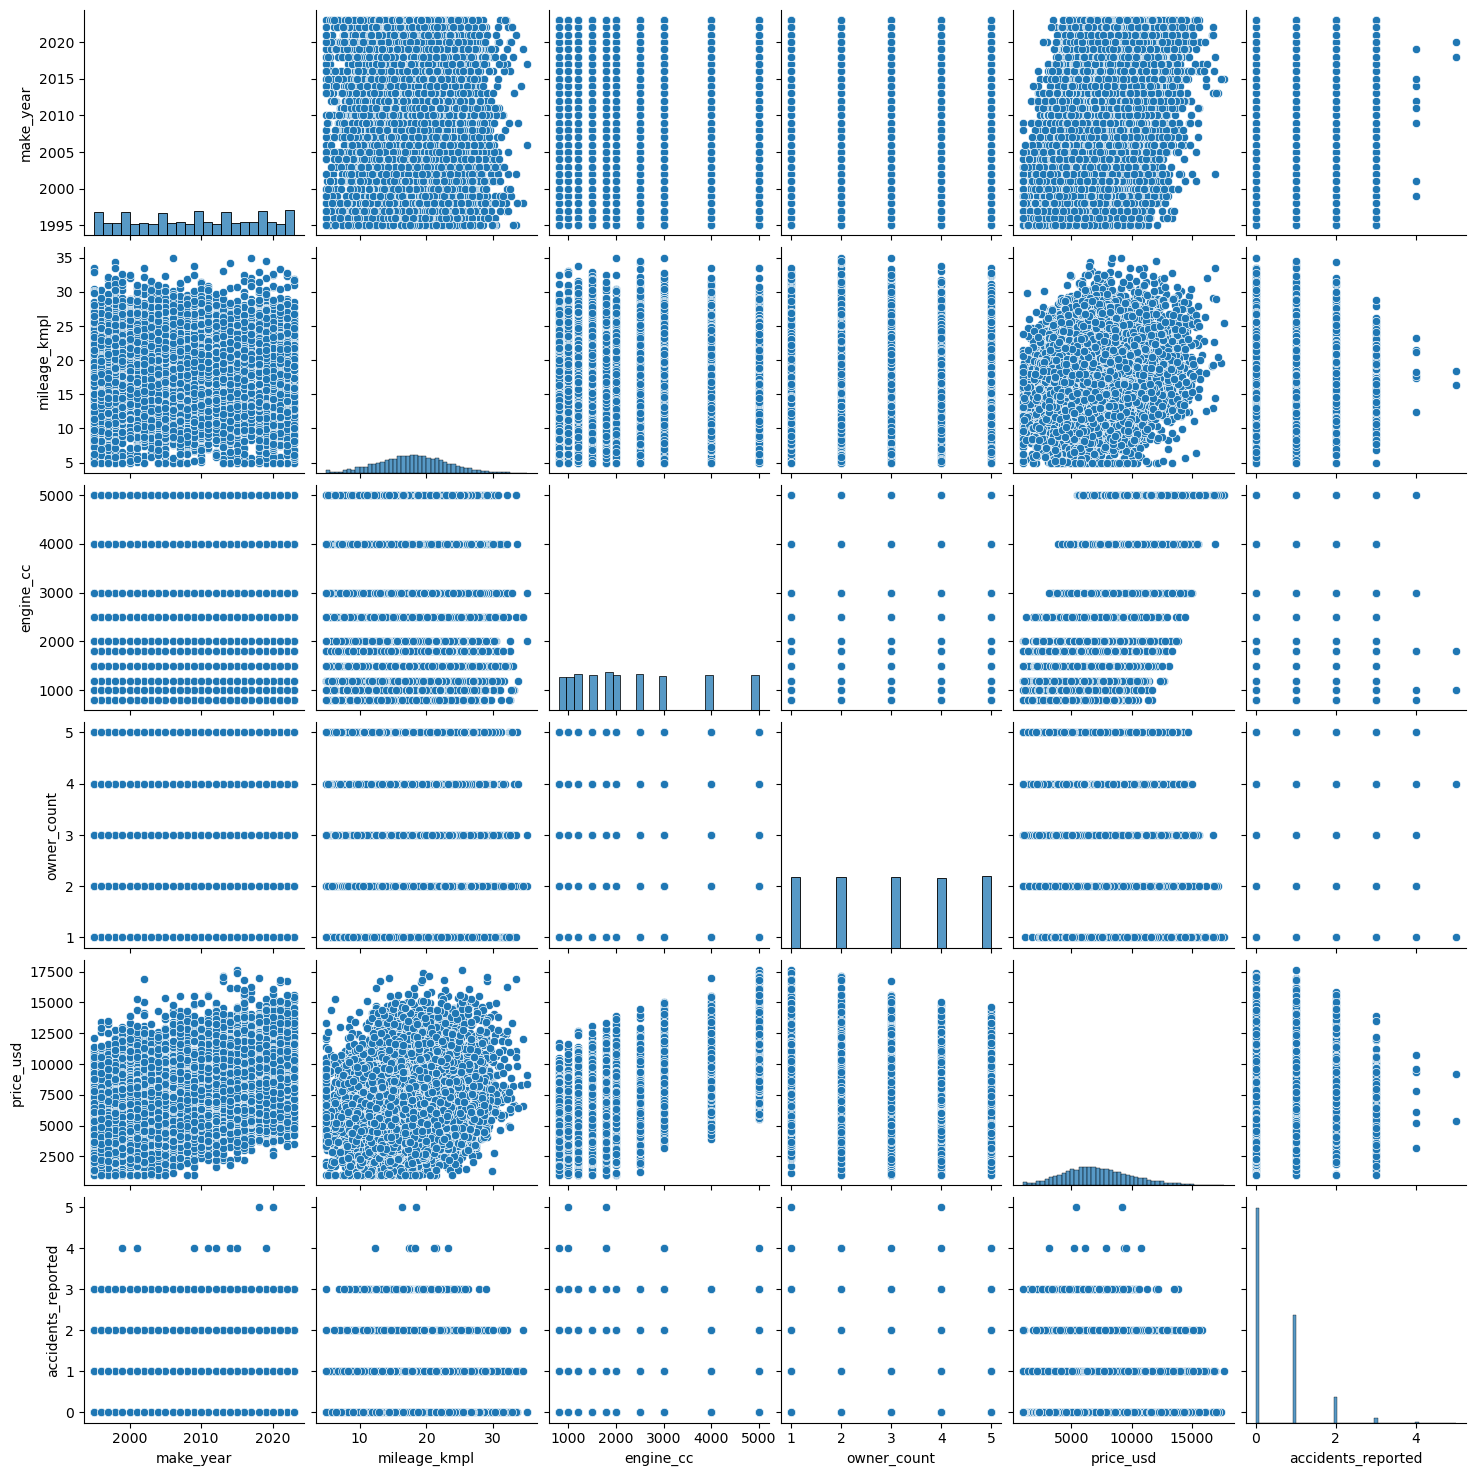

In [24]:
sns.pairplot(df)
plt.show()

In [25]:
def box_plot(data):
    #selecting categorical features
    cat_cols= data.select_dtypes(['object','category']).columns.tolist() 
    #setting axis for the subplots
    fig, axes= plt.subplots(3,2,figsize=(16,12))
    axes= axes.flatten()
    for i, col in enumerate(cat_cols):
        #plotting the box-plot
        sns.boxplot(x= col,y= 'price_usd',data= data, ax= axes[i], hue= col, palette= 'mako')
        plt.tight_layout()
        #setting the title for box-plot
        axes[i].set_title(f"price_usd by {col}")
        #setting the x-label for box-plot
        axes[i].set_xlabel(col)
        #setting the y-label for box-plot
        axes[i].set_ylabel('price_usd')
    plt.show()

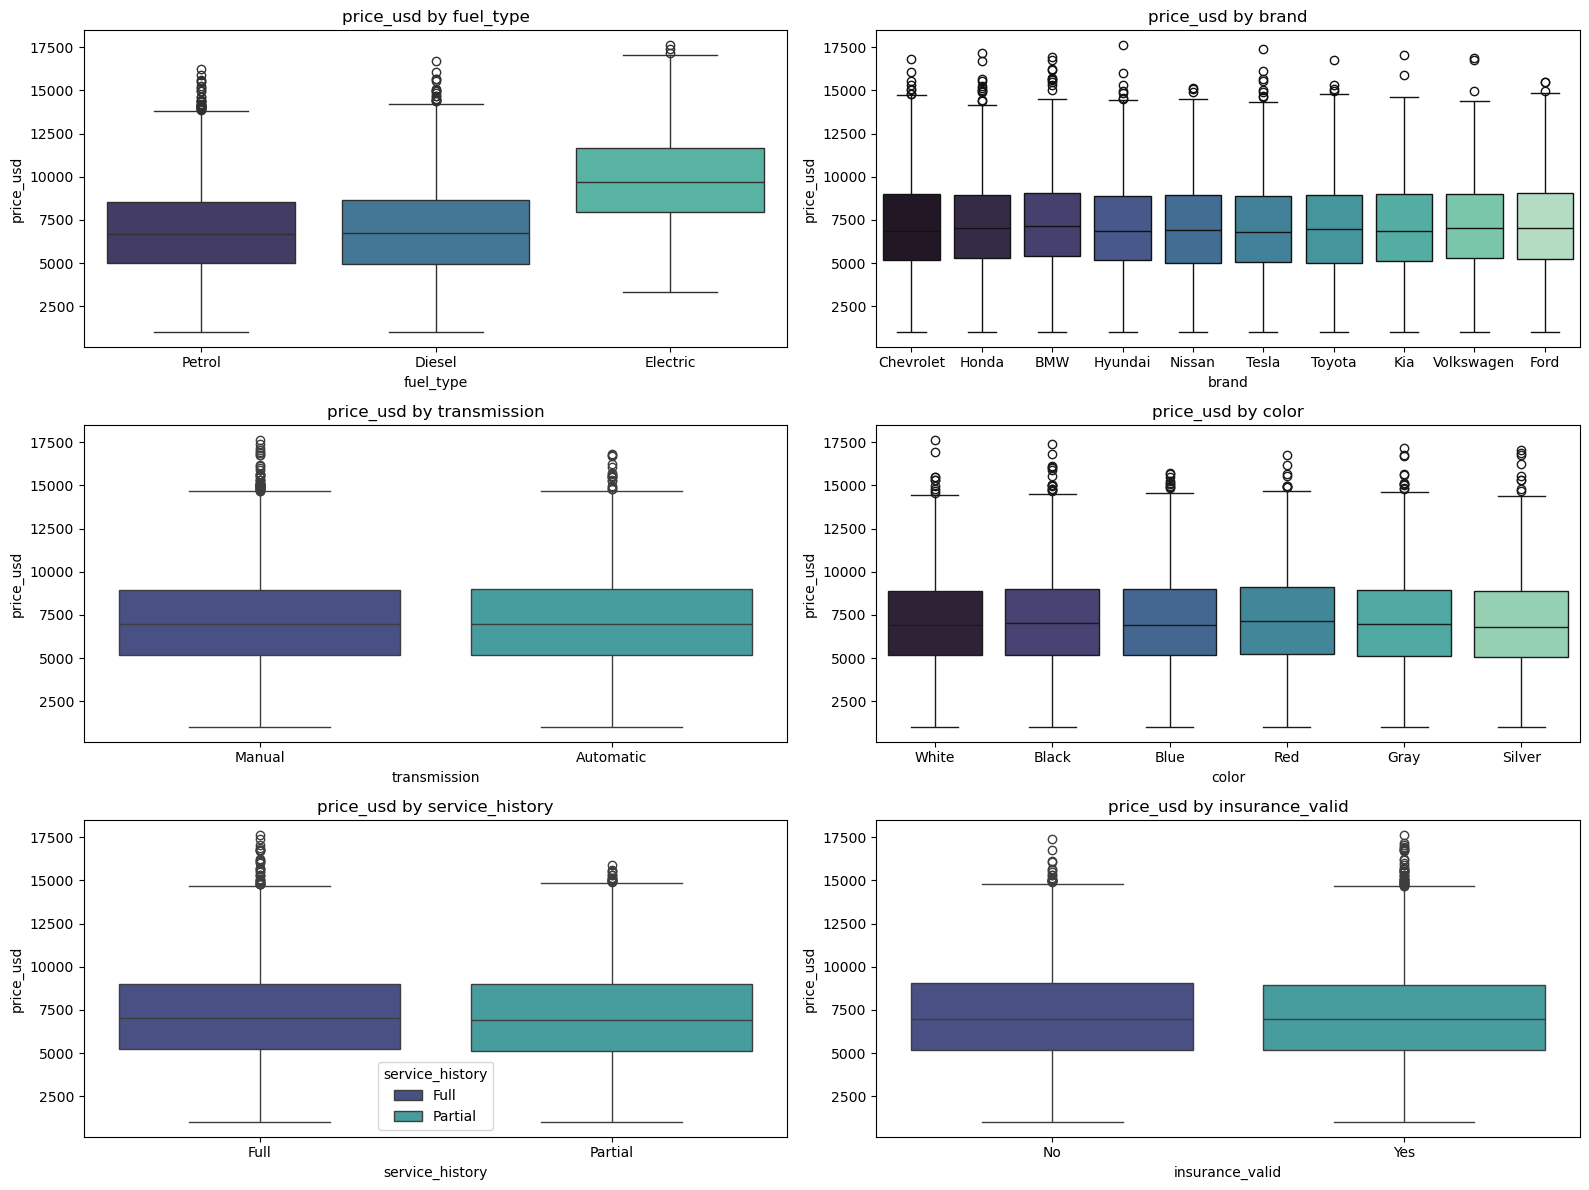

In [26]:
box_plot(df)

### **Data Preprocessing**

In [27]:
#filling missing values for service history column
df['service_history']= df['service_history'].fillna('None')

In [28]:
#saving cleaned data as CSV 
df.to_csv('processed_data.csv')

In [29]:
cat_cols = ['fuel_type', 'transmission', 'color', 'service_history', 'insurance_valid']
target_cols= ['brand']
scale_cols = [ 'mileage_kmpl', 'engine_cc', 'owner_count', 'accidents_reported']

In [30]:
column_trans= make_column_transformer((OneHotEncoder(), cat_cols), 
                                      (TargetEncoder(), target_cols),
                                      (StandardScaler(), scale_cols),
                                      remainder= 'passthrough')

In [31]:
X = df.drop('price_usd', axis=1)
y = df['price_usd']

### **Splitting data into train and test sets**

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.2, random_state=1)

### **Model building**

In [33]:
model= LinearRegression()

In [34]:
pipe= make_pipeline(column_trans, model)

In [35]:
start_time= time.time()

In [36]:
pipe.fit(X_train, y_train)

C:\Users\kunal\Stuti\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['fuel_type', 'transmission',
                                                   'color', 'service_history',
                                                   'insurance_valid']),
                                                 ('targetencoder',
                                                  TargetEncoder(), ['brand']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['mileage_kmpl', 'engine_cc',
                                                   'owner_count',
                                                   'accidents_reported'])])),
                ('linearregression', LinearRegression())])

In [37]:
end_time= time.time()

In [38]:
time_elapsed= end_time - start_time
time_elapsed

0.10521292686462402

In [39]:
y_pred= pipe.predict(X_test)

In [40]:
r2_test= r2_score(y_test, y_pred)
r2_test

0.8745420433258126

In [41]:
model2= XGBRegressor(random_state=1)

In [42]:
pipe2= make_pipeline(column_trans, model2)

In [43]:
xgb_params = {
    'xgbregressor__n_estimators': [100, 200, 500],
    'xgbregressor__learning_rate': [0.01, 0.05, 0.1],
    'xgbregressor__max_depth': [3, 5, 7],
    'xgbregressor__subsample': [0.6, 0.8, 1.0],
    'xgbregressor__reg_alpha': [0, 0.1, 1],
    'xgbregressor__reg_lambda': [0, 0.1, 1],
}

In [44]:
xgb_cv = GridSearchCV(pipe2,
                      xgb_params,
                      cv=3
)

In [45]:
start_time= time.time()

In [46]:
xgb_cv.fit(X_train, y_train)

C:\Users\kunal\Stuti\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['fuel_type',
                                                                          'transmission',
                                                                          'color',
                                                                          'service_history',
                                                                          'insurance_valid']),
                                                                        ('targetencoder',
                                                                         TargetEncoder(),
                                                                         ['brand']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['mileage_kmpl',
                                                                          'engine_cc',
                                                                          'owner_count',
                                                                          '...
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             param_grid={'xgbregressor__learning_rate': [0.01, 0.05, 0.1],
                         'xgbregressor__max_depth': [3, 5, 7],
                         'xgbregressor__n_estimators': [100, 200, 500],
                         'xgbregressor__reg_alpha': [0, 0.1, 1],
                         'xgbregressor__reg_lambda': [0, 0.1, 1],
                         'xgbregressor__subsample': [0.6, 0.8, 1.0]})

In [47]:
end_time= time.time()

In [48]:
time_elapsed= end_time - start_time
time_elapsed

1204.007363319397

In [53]:
final_model= xgb_cv.best_estimator_

In [54]:
y_pred2= final_model.predict(X_test)

In [56]:
r2_test_xgb= r2_score(y_test, y_pred2)
r2_test_xgb

0.8717287776474341

In [59]:
import pickle

In [60]:
pickle.dump(pipe, open('Model.pkl','wb'))